In [1]:
# Import Generic Libraries...
import numpy as np
import numpy.random as rnd
import os


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14 # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels

# Linear Regression (Normal Equation)

In [2]:
# Random datapoints
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

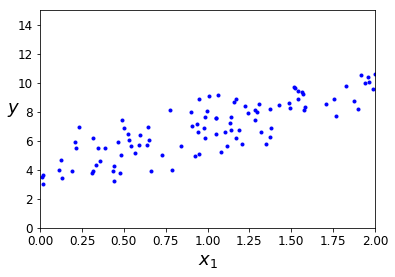

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Using only Numpy...

In [4]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.8962213 ],
       [2.98964552]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8962213 ],
       [9.87551233]])

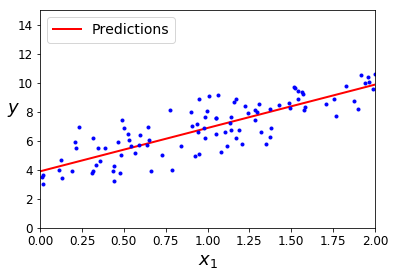

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Using Sklearn...

In [8]:
#No regularization
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8962213]), array([[2.98964552]]))

In [9]:
lin_reg.predict(X_new)

array([[3.8962213 ],
       [9.87551233]])

# Polynomial Regression

In [26]:
#Random datapoints
import numpy as np
import numpy.random as rnd

rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)


array([[1.61761105],
       [8.06185944],
       [4.45250583],
       [0.77958493],
       [1.84625712],
       [2.42319555],
       [4.34161741],
       [6.09231611],
       [1.98223289],
       [3.52597398],
       [4.17601517],
       [9.12288507],
       [5.45422161],
       [2.27678027],
       [2.01026368],
       [2.87326073],
       [0.81318015],
       [1.8319083 ],
       [1.28292861],
       [0.06839479],
       [3.19243691],
       [2.43738261],
       [1.5356506 ],
       [1.28504875],
       [0.3557864 ],
       [4.75426637],
       [1.47885324],
       [1.28677651],
       [2.54692985],
       [3.38548344],
       [4.73964113],
       [2.15170091],
       [3.05310205],
       [8.24583537],
       [6.77765841],
       [5.53583085],
       [1.57507685],
       [4.9628939 ],
       [3.52398974],
       [2.00693334],
       [2.26890937],
       [0.80280214],
       [4.25144683],
       [8.22363289],
       [2.39107959],
       [2.54118912],
       [2.91120971],
       [0.725

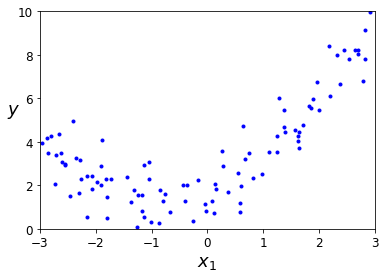

In [17]:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
#Generate polynomial and interaction features.Generate a new feature matrix consisting of all polynomial combinations of 
#the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional 
#and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 2)

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

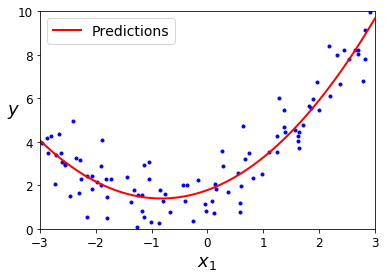

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].

X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Regularized Model (Ridge)

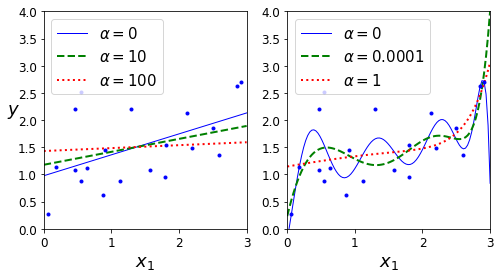

In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline #Pipeline of transforms with a final estimator. 
#Sequentially apply a list of transforms and a final estimator. 
#Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. 
#The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-4, 1))
plt.show()

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="sag") #alpha is the regularization parameter, which has a default value 1 in 
#Ridge implementation within sklearn
# useful solver options are 
#‘auto’: chooses the solver automatically based on the type of data; 
#‘cholesky’: uses the standard scipy.linalg.solve function to obtain a closed-form solution;
#lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
#‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
ridge_reg.fit(X, y)
ridge_reg.predict([[2]])

array([[1.73730141]])

In [57]:
# Stochastic gradient descent
from sklearn.linear_model import SGDRegressor
#SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and 
#the model is updated along the way with a decreasing strength schedule (aka learning rate)
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
#The penalty (aka regularization term) to be used
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#actual value is not important, but you would need to fix this to randomly chosen number, so that every time you get the same result.
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\sreya\AnacondaNew3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.82062962])

## Regularized Model (Lasso)

In [50]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [51]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [69]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=10,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,#When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. 
                       learning_rate="constant",
                       random_state=42)

#The learning rate schedule:
#‘constant’:
#eta = eta0

#‘optimal’:
#eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

#‘invscaling’: [default]
#eta = eta0 / pow(t, power_t)

#‘adaptive’:
#eta = eta0, as long as the training keeps decreasing. 
#Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase 
#validation score by tol if early_stopping is True, the current learning rate is divided by 5.
n_epochs = 50
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


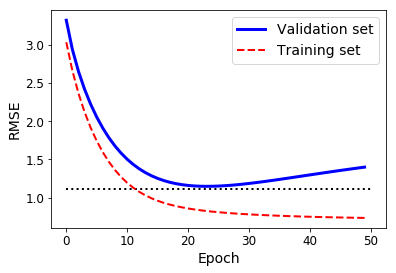

In [70]:
# Best weights after update
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Logistic Regression

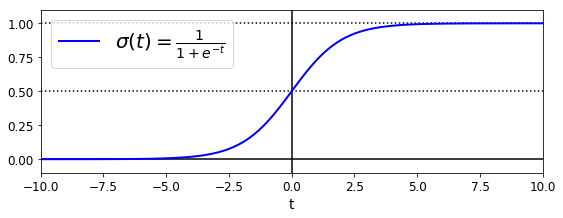

In [71]:
# The sigmoid function
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [72]:
# Iris Dataset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [73]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [90]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

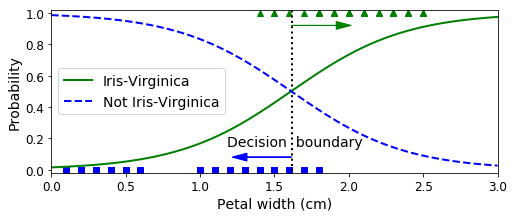

In [91]:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [75]:
decision_boundary


array([1.61561562])

In [92]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

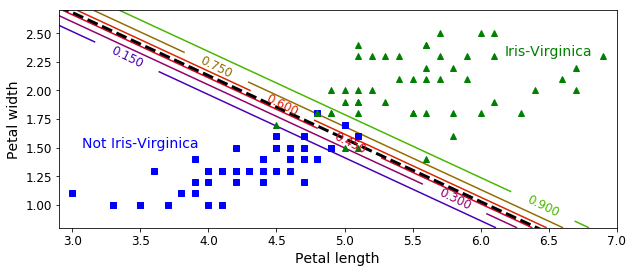

In [77]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

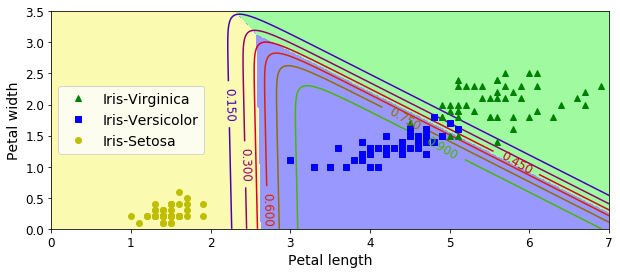

In [93]:
# Contour Plot for three classes
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
#In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, 
#and uses the cross- entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 
#(Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.)

#C : float, default: 1.0
#Inverse of regularization strength; must be a positive float. 
#Like in support vector machines, smaller values specify stronger regularization.
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [79]:
#Softmax prediction
softmax_reg.predict([[5, 2]])

array([2])

In [80]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])